In [1]:
import numpy as np
import matplotlib.pyplot as plt

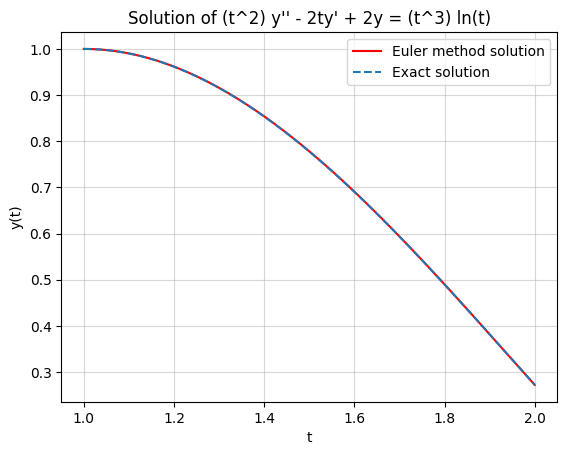

In [12]:
# define the function for the differential equation
def f1(t, u):
    y, v = u    # u is a vector , u =(y, v) where v = dy/dt
    dydt = v
    dvdt = (t * np.log(t)) - ((2*y)/(t**2)) + ((2*v)/t)
    return np.array([dydt, dvdt])  

# function for euler method
def euler_method(f, h , t0, tf, u0):

    n = int((tf - t0)/h)

    T = [t0 + i*h for i in range(n+1)]

    U = np.zeros((len(T), len(u0)))

    U[0] = u0  

    for i in range(1,n+1):
        U[i] = U[i-1] + h * f(T[i-1], U[i-1])


    return np.array(T), np.array(U)

t0 = 1
tf = 2
u0 = np.array([1, 0])
h = 0.001

t_values, u_values = euler_method(f1, h, t0, tf, u0)

def true_sol(t):
    return (1.75*t) + (0.5 * (t**3) * np.log(t)) - (0.75 * (t**3))

y_true = true_sol(t_values)


plt.plot(t_values, u_values[:, 0], label='Euler method solution', color = 'r')
plt.plot(t_values, y_true, linestyle = "--", label = "Exact solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solution of (t^2) y'' - 2ty' + 2y = (t^3) ln(t)")
plt.legend()
plt.grid(True, alpha = 0.5 )
plt.show()
